In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

In [3]:
print(train_data)

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x2

In [4]:
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

In [5]:
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

clf.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=10)

In [8]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.97


In [9]:
predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)
cm

array([[ 962,    0,    2,    1,    0,    4,    3,    2,    2,    4],
       [   0, 1119,    5,    3,    0,    0,    3,    1,    4,    0],
       [   5,    1,  991,   10,    4,    0,    5,   11,    4,    1],
       [   0,    0,    6,  978,    1,    9,    0,    7,    1,    8],
       [   1,    0,    3,    1,  948,    0,    6,    5,    0,   18],
       [   2,    0,    1,    9,    1,  857,    8,    3,    7,    4],
       [   5,    3,    2,    1,    5,    4,  938,    0,    0,    0],
       [   0,    1,    5,    8,    1,    0,    0, 1002,    0,   11],
       [   7,    0,    3,   18,    3,    5,    4,    4,  922,    8],
       [   2,    2,    0,    4,    8,    3,    0,    6,    1,  983]],
      dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.97')

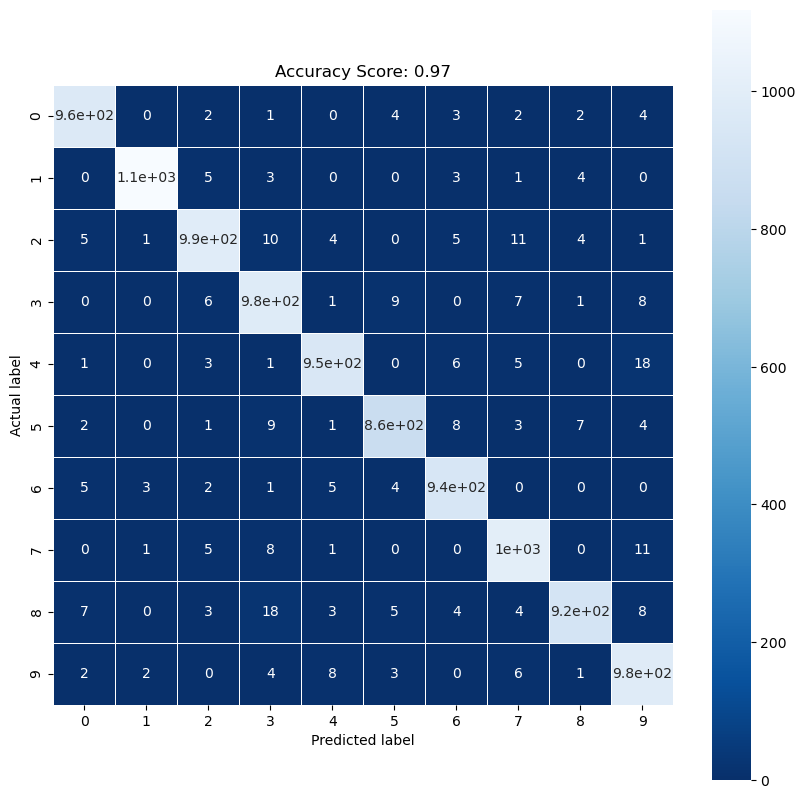

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title)

In [11]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassified_images.append(index)
    index +=1

In [12]:
print(misclassified_images)

[61, 115, 149, 233, 247, 321, 340, 445, 495, 582, 591, 610, 629, 654, 659, 684, 707, 717, 740, 791, 846, 866, 881, 882, 900, 947, 950, 951, 956, 965, 1003, 1012, 1014, 1022, 1044, 1112, 1178, 1181, 1224, 1226, 1232, 1242, 1247, 1299, 1319, 1328, 1378, 1393, 1395, 1414, 1464, 1496, 1500, 1522, 1530, 1549, 1553, 1601, 1609, 1681, 1712, 1717, 1718, 1722, 1737, 1754, 1773, 1800, 1828, 1855, 1878, 1901, 1909, 1940, 1952, 1968, 1982, 1984, 1987, 2004, 2024, 2044, 2053, 2109, 2118, 2130, 2135, 2182, 2224, 2272, 2280, 2293, 2308, 2329, 2369, 2387, 2425, 2488, 2496, 2534, 2582, 2607, 2611, 2618, 2635, 2648, 2654, 2720, 2743, 2760, 2771, 2810, 2877, 2896, 2915, 2921, 2930, 2938, 2939, 2952, 2953, 3060, 3073, 3115, 3117, 3130, 3172, 3225, 3284, 3289, 3333, 3384, 3388, 3422, 3475, 3490, 3503, 3520, 3549, 3559, 3567, 3597, 3674, 3727, 3757, 3767, 3776, 3780, 3796, 3808, 3811, 3818, 3826, 3853, 3893, 3906, 3941, 3943, 3995, 4011, 4065, 4075, 4102, 4156, 4180, 4199, 4201, 4212, 4224, 4248, 4289, 4313

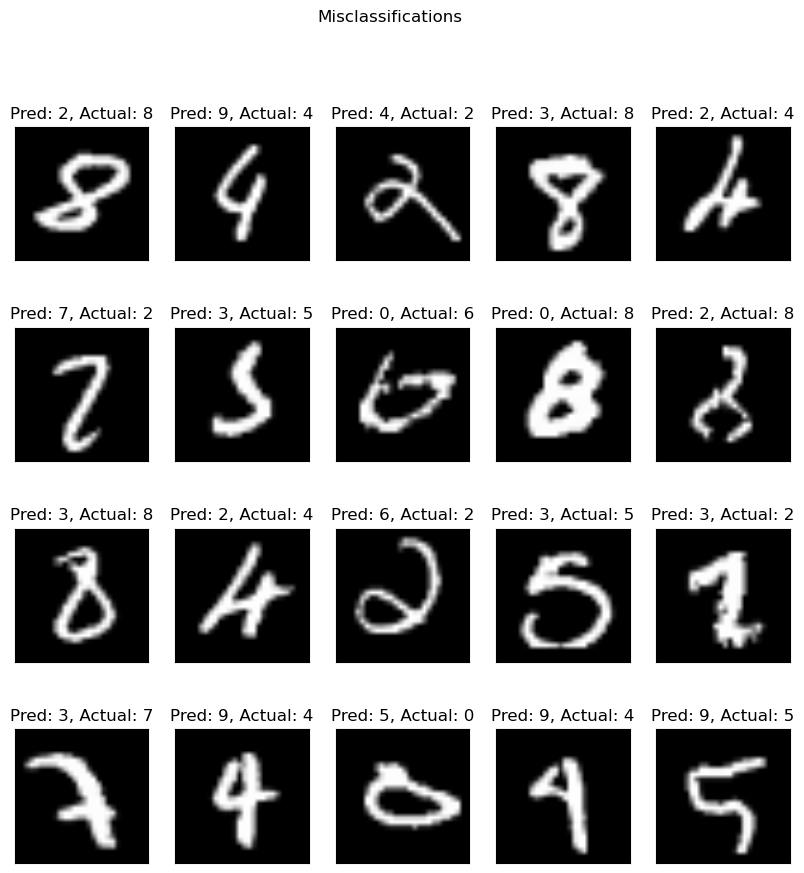

In [13]:
plt.figure(figsize=(10, 10))
plt.suptitle('Misclassifications')

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4, 5, plot_index + 1)  # 4x5 plot

    p.imshow(X_test[bad_index].reshape(28, 28), cmap=plt.cm.gray,
             interpolation='bilinear')
    p.set_xticks(())
    p.set_yticks(())  # remove ticks

    p.set_title(f'Pred: {predictions[bad_index]}, Actual: {y_test[bad_index]}')
    
plt.show()